# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from math import sqrt

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


In [3]:
cities

['puerto ayora',
 'namibe',
 'borba',
 'kattivakkam',
 'papao',
 'caleta de carquin',
 'vilyuysk',
 'puerto natales',
 'hafar al-batin',
 'sao vicente',
 'blackmans bay',
 'ushuaia',
 'bel ombre',
 'aasiaat',
 'port-aux-francais',
 'cao bang',
 'stanley',
 'hermanus',
 'oruro',
 'coronel suarez',
 'brokopondo',
 'hastings',
 'arno',
 'madinat ash shamal',
 'waitangi',
 'chiang rai',
 'tofol',
 'sao joao da barra',
 'yellowknife',
 'idri',
 'dudinka',
 'port elizabeth',
 'nemuro',
 'melenci',
 'gadzhiyevo',
 'arar',
 'bethel',
 'margaret river',
 'olonkinbyen',
 'jamestown',
 'badger',
 'punta arenas',
 'bredasdorp',
 'edinburgh of the seven seas',
 'la sarre',
 'isafjordur',
 'gisborne',
 'alotau',
 'adrar',
 "la'ie",
 'christchurch',
 'katsuura',
 'tiksi',
 'oriximina',
 'iqaluit',
 "st. john's",
 'georgetown',
 'bilibino',
 'taiohae',
 'bumba',
 'ribeira grande',
 'luau',
 'ad dawadimi',
 'gulf shores',
 'hobyo',
 'fale old settlement',
 'antofagasta',
 'remire-montjoly',
 'tobruk',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities 
    try:
        response = requests.get(city_url).json()
        #print(i)
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["main"]
        #print(response)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']["temp_max"]
        city_humidity = response['main']["humidity"]
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | borba
Processing Record 4 of Set 1 | kattivakkam
Processing Record 5 of Set 1 | papao
Processing Record 6 of Set 1 | caleta de carquin
Processing Record 7 of Set 1 | vilyuysk
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | hafar al-batin
Processing Record 10 of Set 1 | sao vicente
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bel ombre
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | cao bang
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | oruro
Processing Record 20 of Set 1 | coronel suarez
Processing Record 21 of Set 1 | brokopondo
Processing Record 22 of Set 1 | hastings
Process

Processing Record 36 of Set 4 | ciechocinek
Processing Record 37 of Set 4 | sinabang
Processing Record 38 of Set 4 | newman
Processing Record 39 of Set 4 | dryden
Processing Record 40 of Set 4 | el suchil
City not found. Skipping...
'weather'
Processing Record 41 of Set 4 | hirara
Processing Record 42 of Set 4 | vorkuta
Processing Record 43 of Set 4 | qaqortoq
Processing Record 44 of Set 4 | fonadhoo
City not found. Skipping...
'weather'
Processing Record 45 of Set 4 | voi
Processing Record 46 of Set 4 | samdrup jongkhar
Processing Record 47 of Set 4 | kingston
Processing Record 48 of Set 4 | antonio enes
Processing Record 49 of Set 4 | araguaina
Processing Record 0 of Set 5 | faya-largeau
Processing Record 1 of Set 5 | tranovaho
City not found. Skipping...
'weather'
Processing Record 2 of Set 5 | smithers
Processing Record 3 of Set 5 | oyama
Processing Record 4 of Set 5 | aibak
Processing Record 5 of Set 5 | cloverdale
Processing Record 6 of Set 5 | north bend
Processing Record 7 of S

Processing Record 25 of Set 8 | nantucket
Processing Record 26 of Set 8 | princeville
Processing Record 27 of Set 8 | pariaman
Processing Record 28 of Set 8 | nema
Processing Record 29 of Set 8 | arteche
Processing Record 30 of Set 8 | akrehamn
Processing Record 31 of Set 8 | karlskrona
Processing Record 32 of Set 8 | hameenlinna
Processing Record 33 of Set 8 | chonchi
Processing Record 34 of Set 8 | port shepstone
Processing Record 35 of Set 8 | rawson
Processing Record 36 of Set 8 | ormara
Processing Record 37 of Set 8 | onega
Processing Record 38 of Set 8 | kingscliff
Processing Record 39 of Set 8 | iskateley
Processing Record 40 of Set 8 | filipstad
Processing Record 41 of Set 8 | mao
Processing Record 42 of Set 8 | kendari
Processing Record 43 of Set 8 | paradip garh
Processing Record 44 of Set 8 | tazovsky
Processing Record 45 of Set 8 | durgapur
Processing Record 46 of Set 8 | lycksele
Processing Record 47 of Set 8 | san luis de la loma
Processing Record 48 of Set 8 | vernon
Pro

City not found. Skipping...
'weather'
Processing Record 13 of Set 12 | yerofey pavlovich
Processing Record 14 of Set 12 | krasnozerskoye
Processing Record 15 of Set 12 | kourou
Processing Record 16 of Set 12 | nagqu
Processing Record 17 of Set 12 | pyt-yakh
Processing Record 18 of Set 12 | lincoln city
Processing Record 19 of Set 12 | al jawf
Processing Record 20 of Set 12 | yulinshi
Processing Record 21 of Set 12 | mogadishu
Processing Record 22 of Set 12 | camabatela
Processing Record 23 of Set 12 | thinadhoo
Processing Record 24 of Set 12 | kaa-khem
Processing Record 25 of Set 12 | linxi
Processing Record 26 of Set 12 | samana
Processing Record 27 of Set 12 | smirnykh
Processing Record 28 of Set 12 | san pedro de macoris
Processing Record 29 of Set 12 | hasaki
Processing Record 30 of Set 12 | kasane
Processing Record 31 of Set 12 | port moresby
Processing Record 32 of Set 12 | sayansk
Processing Record 33 of Set 12 | bengkulu
Processing Record 34 of Set 12 | negapatam
Processing Rec

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,297.29,81,59,4.92,EC,1697152827
1,namibe,-15.1961,12.1522,291.69,83,21,2.34,AO,1697152747
2,borba,-4.3878,-59.5939,305.79,38,91,1.26,BR,1697152748
3,kattivakkam,13.2167,80.3167,300.97,81,100,0.83,IN,1697153205
4,papao,-17.7500,-149.5500,301.97,78,18,6.22,PF,1697153206


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,297.29,81,59,4.92,EC,1697152827
1,namibe,-15.1961,12.1522,291.69,83,21,2.34,AO,1697152747
2,borba,-4.3878,-59.5939,305.79,38,91,1.26,BR,1697152748
3,kattivakkam,13.2167,80.3167,300.97,81,100,0.83,IN,1697153205
4,papao,-17.7500,-149.5500,301.97,78,18,6.22,PF,1697153206


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

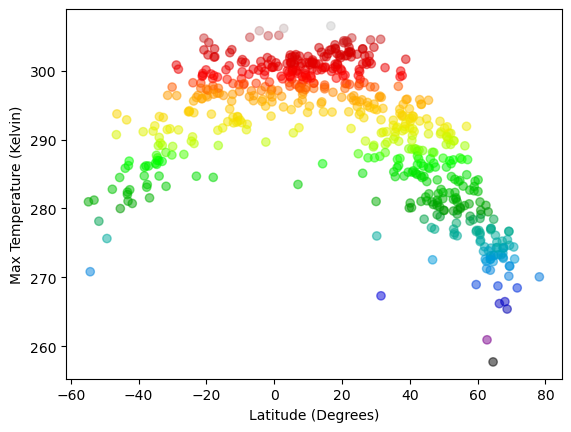

In [33]:
# Build scatter plot for latitude vs. temperature
colors = [sqrt(temp*temp) for temp in city_data_df['Max Temp']]
plt.scatter('Lat', 'Max Temp', alpha=.5, data=city_data_df, c=colors, cmap='nipy_spectral')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Max Temperature (Kelvin)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

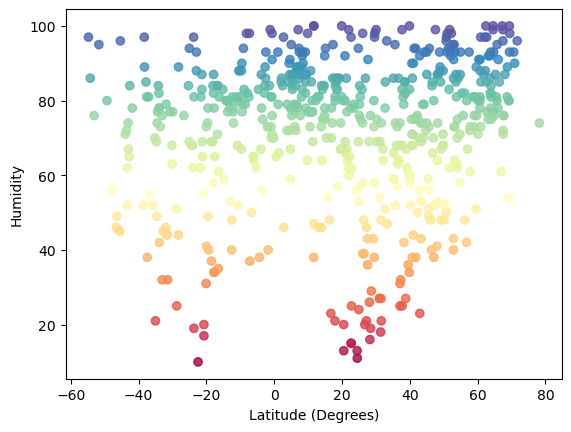

In [44]:
# Build the scatter plots for latitude vs. humidity
colors = [sqrt(datapoint*datapoint) for datapoint in city_data_df['Humidity']]
plt.scatter('Lat', 'Humidity', alpha=.8, data=city_data_df, c=colors, cmap='Spectral')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

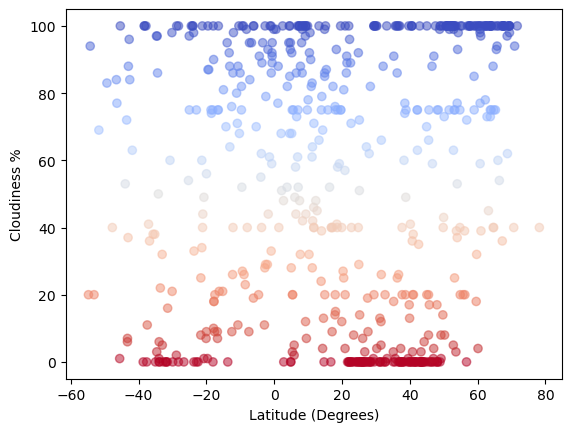

In [52]:
# Build the scatter plots for latitude vs. cloudiness
colors = [sqrt(datapoint*datapoint) for datapoint in city_data_df['Cloudiness']]
plt.scatter('Lat', 'Cloudiness', alpha=.5, data=city_data_df, c=colors, cmap='coolwarm_r')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Cloudiness %')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

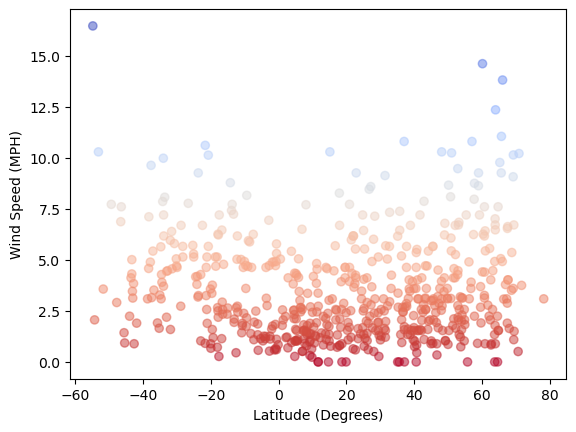

In [54]:
# Build the scatter plots for latitude vs. wind speed
colors = [sqrt(datapoint*datapoint) for datapoint in city_data_df['Wind Speed']]
plt.scatter('Lat', 'Wind Speed', alpha=.5, data=city_data_df, c=colors, cmap='coolwarm_r')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Wind Speed (MPH)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [176]:
# Define a function to create Linear Regression plots
def regress(x, y, xlabel, ylabel, coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.annotate(line_eq ,coords, fontsize=15, color="red")
    plt.title(f'R: {rvalue}', loc='left')
    # Citation: https://stackoverflow.com/questions/59829077/how-to-display-r-squared-value-on-my-graph-in-python
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [177]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kattivakkam,13.2167,80.3167,300.97,81,100,0.83,IN,1697153205
6,vilyuysk,63.7553,121.6247,271.03,82,73,4.92,RU,1697153207
8,hafar al-batin,28.4328,45.9708,304.47,19,0,3.09,SA,1697153208
13,aasiaat,68.7098,-52.8699,265.39,81,97,3.51,GL,1697153211
15,cao bang,22.6667,106.2500,291.60,97,71,0.59,VN,1697153212


In [178]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,297.29,81,59,4.92,EC,1697152827
1,namibe,-15.1961,12.1522,291.69,83,21,2.34,AO,1697152747
2,borba,-4.3878,-59.5939,305.79,38,91,1.26,BR,1697152748
4,papao,-17.7500,-149.5500,301.97,78,18,6.22,PF,1697153206
5,caleta de carquin,-11.0925,-77.6267,292.52,81,80,5.02,PE,1697152750


In [179]:
len(northern_hemi_df['Max Temp'])

425

###  Temperature vs. Latitude Linear Regression Plot

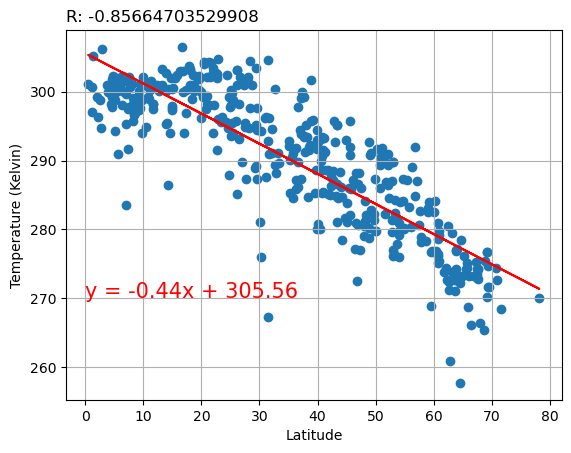

In [180]:
# Linear regression on Northern Hemisphere
regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Temperature (Kelvin)', (0, 270))

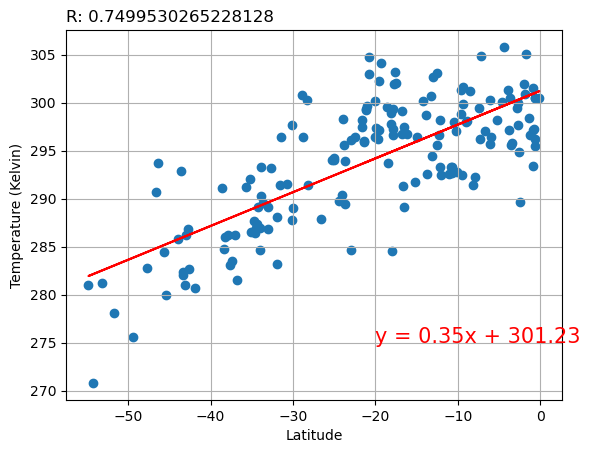

In [181]:
# Linear regression on Southern Hemisphere
regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Temperature (Kelvin)', (-20, 275))

**Discussion about the linear relationship: As we approach the equator (latitude=0), the temperature increases. There is a linear relationship between latitude and temperature as evidenced by the r values.

### Humidity vs. Latitude Linear Regression Plot

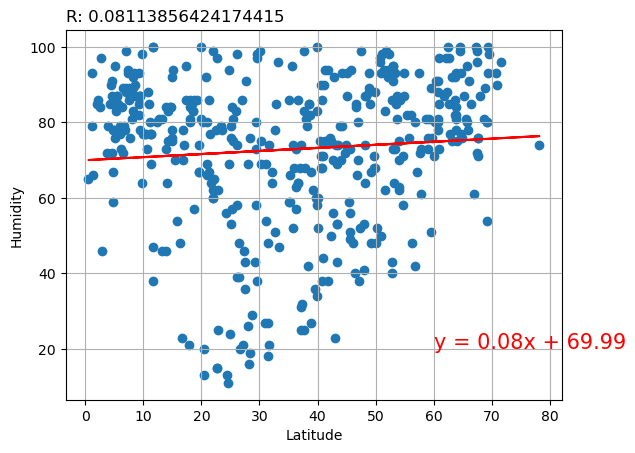

In [182]:
# Northern Hemisphere
regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (60, 20))

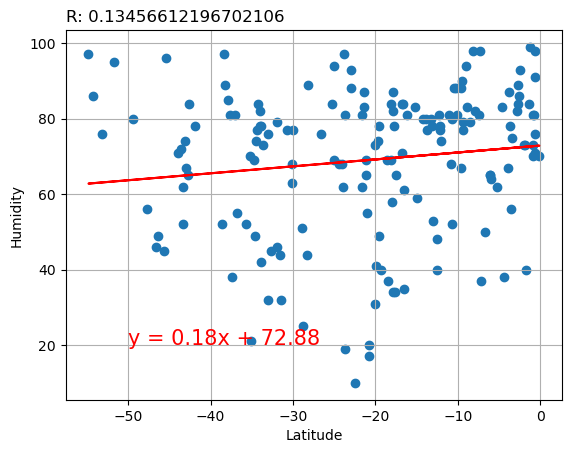

In [183]:
# Southern Hemisphere
regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', (-50, 20))

**Discussion about the linear relationship: There is very little correlation between humidity and latitude. This makes sense as there are places near the equator that are deserts as well as others that are rainforests.

### Cloudiness vs. Latitude Linear Regression Plot

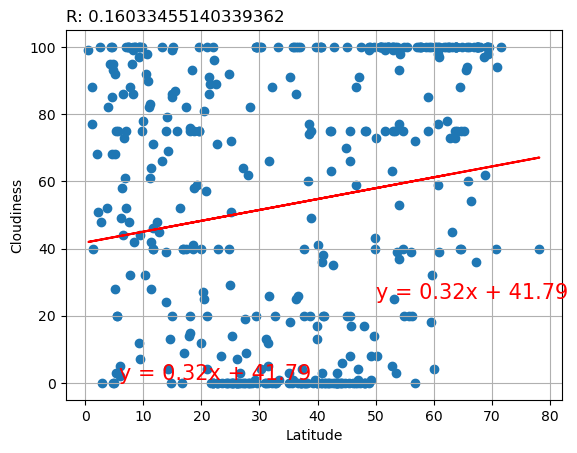

In [184]:
# Northern Hemisphere
regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (50, 25))

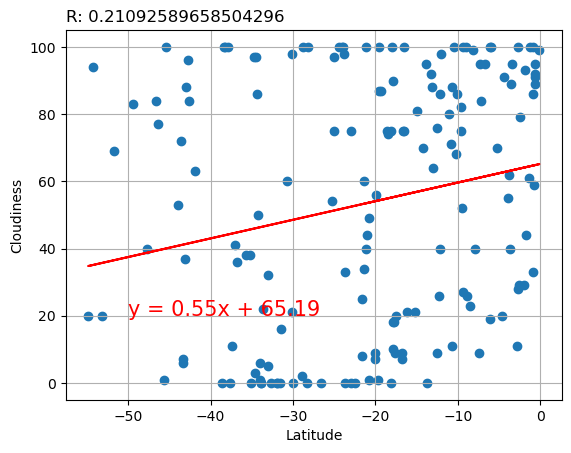

In [185]:
# Southern Hemisphere
regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (-50, 20))

**Discussion about the linear relationship:** There is no linear relationship between latitude and cloudiness, there are many cities with 100 and 0 cloudiness in both hemispheres and a large amount of cities at around 75 cloudiness in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

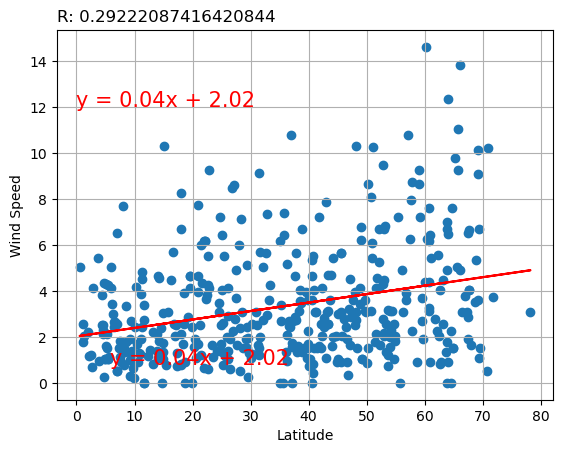

In [186]:
# Northern Hemisphere
regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (0, 12))

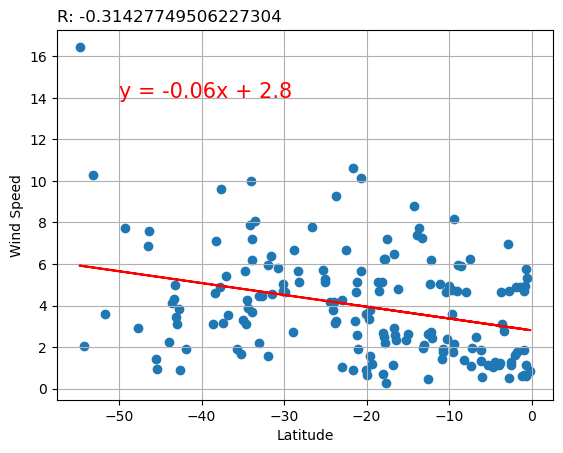

In [187]:
# Southern Hemisphere
regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (-50, 14))

**Discussion about the linear relationship:** There is a weak linear relationship between wind speed and latitude as shown by the r values being approximately +/-0.3